In [2]:
""" -------------------------------------------------------------------------------------------------------------------
# Test script to establish AI.zymes on SCC
" ---------------------------------------------------------------------------------------------------------------------
""" 
# ADJUST INDENTICAL SCORE!

import sys, os
if os.path.join(os.getcwd(), '../../src') not in sys.path: sys.path.append(os.path.join(os.getcwd(), '../../src'))
from AIzymes_015 import *

# GENERAL SETTINGS FOR AI.zymes ---------------------------------------------------------------------------------------
AIzymes = AIzymes_MAIN()
AIzymes.setup(FOLDER_HOME = 'TEST_RAVEN',
  FOLDER_PARENT     = 'parent',
              
  MAX_JOBS          = 18,
  MAX_GPUS          = 1,
  MEMORY            = 100,
  N_PARENT_JOBS     = 36,
  MAX_DESIGNS       = 100,
  KBT_BOLTZMANN     = [0.5, 0.0003],
  CST_WEIGHT        = 1.0,
  CST_NAME          = "5TS_enzdes_planar_tAB100",
  WT                = "7vuu",
  LIGAND            = "5TS",
  DESIGN            = "4,8,16,21,25,28,40,41,44,52,57,60,61",
  SYSTEM            = "RAVEN",
  EXPLORE           = True,
  RUN_PARALLEL      = True,
  SUBMIT_PREFIX     = "TEST",
  SCORING_METHODS   = ['ESMfold','RosettaRelax','ElectricFields'],              
 )

2025-02-27 15:20:51 - INFO - Job will be run in PARALLEL mode with 18 cpus. It is recommended to set N_PARENT_JOBS to at least 36.
2025-02-27 15:20:51 - INFO - Add a chheck here for GPU request, failing if GPUs are requested wrongly!


Do you really want to restart AIzymes from scratch? 
    This will delete all existing files in /raven/u/bunzela/AIzymes/design/TEST/TEST_RAVEN [y/n]

     y


2025-02-27 15:21:49 - INFO - Running AI.zymes setup.
2025-02-27 15:21:49 - INFO - Content of /raven/u/bunzela/AIzymes/design/TEST/TEST_RAVEN deleted.
2025-02-27 15:21:49 - INFO - Happy AI.zymeing! :)
2025-02-27 15:21:54 - DEBUG - Child index 0 created for parent index Parent.
2025-02-27 15:21:54 - DEBUG - Child index 1 created for parent index Parent.
2025-02-27 15:21:54 - DEBUG - Child index 2 created for parent index Parent.
2025-02-27 15:21:54 - DEBUG - Child index 3 created for parent index Parent.
2025-02-27 15:21:54 - DEBUG - Child index 4 created for parent index Parent.
2025-02-27 15:21:54 - DEBUG - Child index 5 created for parent index Parent.
2025-02-27 15:21:54 - DEBUG - Child index 6 created for parent index Parent.
2025-02-27 15:21:54 - DEBUG - Child index 7 created for parent index Parent.
2025-02-27 15:21:54 - DEBUG - Child index 8 created for parent index Parent.
2025-02-27 15:21:54 - DEBUG - Child index 9 created for parent index Parent.
2025-02-27 15:21:54 - DEBUG - 

In [9]:
import sys, os
if os.path.join(os.getcwd(), '../../src') not in sys.path: sys.path.append(os.path.join(os.getcwd(), '../../src'))
from AIzymes_015 import *
AIzymes = AIzymes_MAIN()
AIzymes.initialize(FOLDER_HOME = 'TEST_RAVEN', LOG="debug", PRINT_VAR=False) 
AIzymes.submit_controller()

ERROR! Job with prefix TEST is already running. Refusing to start another job in parallel


In [31]:
!squeue --me  
##!ls TEST_RAVEN		
#!scancel --me

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)


In [34]:
import pandas as pd
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
file_path = "TEST_RAVEN/all_scores.csv"
df = pd.read_csv(file_path)
#display(df)
print(len(df))
print(df["total_score"].notna().sum())

index=0
print(df.iloc[index])

2140
100
sequence                         LREEFRVEDKDGNGYISAAELRIVFTNNGEPLTDEEVDELFRETDIDGDGQINYEEFVQRVRA
parent_index                                                                              Parent
generation                                                                                     0
total_mutations                                                                              6.0
parent_mutations                                                                             6.0
score_taken_from                                                                   RosettaDesign
design_method                                                                      RosettaDesign
blocked                                                                                unblocked
cat_resi                                                                                       8
cat_resn                                                                                     GLU
next_steps           

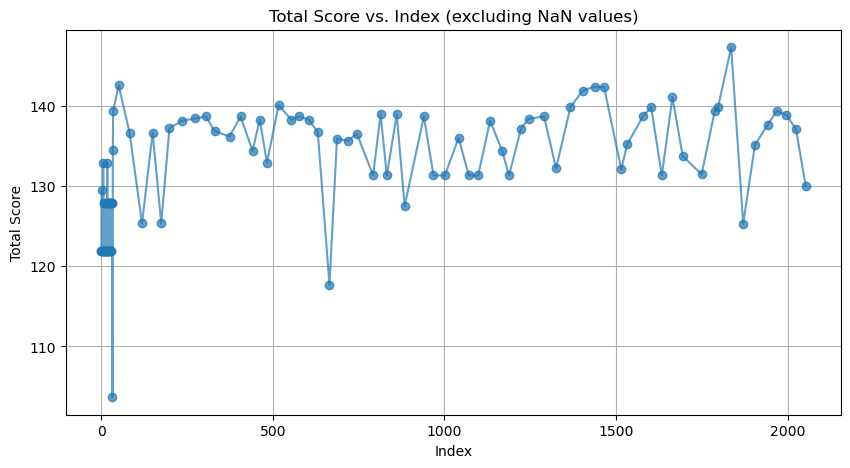

In [36]:
import matplotlib.pyplot as plt

# Filter out NaN values
df_filtered = df.dropna(subset=["total_score"])

# Plot total_score against index
plt.figure(figsize=(10, 5))
plt.plot(df_filtered.index, -df_filtered["total_score"], marker='o', linestyle='-', alpha=0.7)
plt.xlabel("Index")
plt.ylabel("Total Score")
plt.title("Total Score vs. Index (excluding NaN values)")
plt.grid(True)
plt.show()


In [32]:
!tail -n 30 TEST_RAVEN/controller.log	 
#!cat TEST_RAVEN/controller.log	

2025-02-27 16:29:34 - DEBUG - Updating scores
Unblocking all
Stopped because 2140/100 designs have been made.
                                  
Global information about the job: 
  
Job owner: bunzela(51771)
Job name:  TEST_controller
Node list: ravg1003
Job start: Thu Feb 27 15:22:00 CET 2025
Job end:   Thu Feb 27 16:29:39 CET 2025
Work dir:  /raven/u/bunzela/AIzymes/design/TEST
Command:   /raven/u/bunzela/AIzymes/design/TEST/TEST_RAVEN/submit_controller_parallel.sh
  
  
  
Information on jobsteps (Note: MaxRSS/AveRSS is the maximum/average over all 
tasks of the per-task memory high-water marks; cf. "man sacct"): 
  
JobID            JobName NNodes NTasks  NCPUS       MaxRSS       AveRSS    Elapsed ExitCode
------------- ---------- ------ ------ ------ ------------ ------------ ---------- --------
15897108      TEST_contr      1            36                             01:07:39      0:0
  
Maximum memory per node: 28.611755 GB (defined as MaxRSS*Ntasks/NNodes)
CPU utilization: 52.

In [6]:
import re
FOLDER_HOME='/raven/u/bunzela/AIzymes/design/TEST/TEST_RAVEN'
index=26
job="ESMfold"

with open(f'{FOLDER_HOME}/{index}/scripts/{job}_{index}.sh', "r") as f: script = f.read()
match = re.search(r'CUDA_VISIBLE_DEVICES\s*=\s*([0-9]+)', script)

print(script)

if match: 
    gpu = int(match.group(1))
    print(gpu)
    self.gpus[gpu] = process 
    logging.debug(f'XXXXXXXXXx {script} {free_gpu} helper_002')  


FileNotFoundError: [Errno 2] No such file or directory: '/raven/u/bunzela/AIzymes/design/TEST/TEST_RAVEN/26/scripts/ESMfold_26.sh'